<p align="center">
<img src="https://github.com/adelnehme/introduction-to-python/blob/master/assets/hsbc_datacamp.png?raw=True" width="65%">
</p>

<br>

## **Introduction to Python Learning Session**



#### **Learning Objectives**

- Understand the value of Python on the path to developing data fluency
- Import data into Python using `pandas` — Python’s most popular data analysis package
- Filter, add new columns, and analyze datasets using pandas
- Present data visualizations using `Matplotlib` and `Seaborn` — Python’s most popular data visualization
packages
- A discussion on the long term benefits and use cases for data work with Python

#### **The Dataset**

The dataset to be used in this session is a CSV file named `telco_churn.csv`, which contains data on telecom customers churning and some of their key behaviors. It contains the following columns:


- `customerID`: Unique identifier of a customer.
- `gender`: Gender of customer.
- `SeniorCitizen`: Binary variable indicating if customer is senior citizen.
- `Partner`: Binary variable if customer has a partner.
- `tenure`: Number of weeks as a customer.
- `PhoneService`: Whether customer has phone service.
- `MultipleLines`: Whether customer has multiple lines.
- `InternetService`: What type of internet service customer has (`"DSL"`, `"Fiber optic"`, `"No"`).
- `OnlineSecurity`: Whether customer has online security service.
- `OnlineBackup`: Whether customer has online backup service.
- `DeviceProtection`: Whether customer has device protection service.
- `TechSupport`: Whether customer has tech support service.
- `StreamingTV`: Whether customer has TV streaming service.
- `StreamingMovies`: Whether customer has movies streaming service.
- `PaymentMethod`: Payment method.
- `MonthlyCharges`: Amount of monthly charges in $.
- `TotalCharges`: Amount of total charges so far.
- `Churn`: Whether customer `'Stayed'` or `'Churned'`.


#### **Questions to answer**

- **Question 1:** What are the number of churners vs non-churners?
- **Question 2:** What is the breakdown of tenure distirbution by churners and non-churners?
- **Question 3:** What is the average monthly charge for churners vs non-churners?

## **Getting started**

In [ ]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

*To import a CSV file into* `pandas` , *we use*  `data = pd.read_csv(file_path)` *check out this [documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html) for importing other data types*


In [ ]:
# Read in the dataset
telco = pd.read_csv('https://github.com/adelnehme/introduction-to-python/blob/master/data/telco_churn.csv?raw=true')

*Some common methods needed to get a better understanding of your DataFrames:*

- `data.head()` *prints the first 5 rows*
- `data.describe()` *prints the distribution of numeric columns*
- `data.info()` *prints the missingness and data types of columns*

In [ ]:
# Inspect header of dataset
telco.head()

,customerID,gender,SeniorCitizen,Partner,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,1,No,No phone service,DSL,No,Yes,No,No,No,No,Electronic check,29.85$,29.85,Stayed
1,5575-GNVDE,Male,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,Mailed check,56.95$,1889.50,Stayed
2,3668-QPYBK,Male,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Mailed check,53.85$,108.15,Churned
3,7795-CFOCW,Male,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,Bank transfer (automatic),42.3$,1840.75,Stayed
4,9237-HQITU,Female,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Electronic check,70.7$,151.65,Churned


* _**Problem 1:** Taking a look at the_ `MonthlyCharges` _column, it seems it's not a numeric data type since there is a `$` sign_

In [ ]:
# Check description of dataset
telco.describe()

,tenure,TotalCharges
count,7043.000000,7043.000000
mean,32.371149,2281.916928
std,24.559481,2265.270398
min,0.000000,18.800000
25%,9.000000,402.225000
50%,29.000000,1397.475000
75%,55.000000,3786.600000
max,72.000000,8684.800000


In [ ]:
# Check information of dataset
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7028 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7035 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  PaymentMethod     7043 non-null   object 
 15  MonthlyCharges    7043 non-null   object 
 16  TotalCharges      7043 non-null   float64


* _**Problem 2:** There seems to be missing values in the_ `customerID` & `OnlineSecurity` _columns._



---

<center><h1> Q&A 1</h1> </center>

---





## **Data Cleaning**

##### **Task 1:** Remove `$` from `MonthlyCharges` and convert it to `float`

_To remove a character from a string column, we can use:_

```
data['column_name'] = data['column_name'].str.strip(character)
```

_To convert a numeric column to a float, we can use:_

```
data['column_name'] = data['column_name'].astype('float')
```


In [ ]:
# Strip $ from MonthlyCharges column
telco['MonthlyCharges'] = telco['MonthlyCharges'].str.strip('$')

# Convert MonthlyCharges column to float
telco['MonthlyCharges'] = telco['MonthlyCharges'].astype('float')

# Print header again
telco.head()

,customerID,gender,SeniorCitizen,Partner,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,1,No,No phone service,DSL,No,Yes,No,No,No,No,Electronic check,29.85,29.85,Stayed
1,5575-GNVDE,Male,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,Mailed check,56.95,1889.50,Stayed
2,3668-QPYBK,Male,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Mailed check,53.85,108.15,Churned
3,7795-CFOCW,Male,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,Bank transfer (automatic),42.30,1840.75,Stayed
4,9237-HQITU,Female,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Electronic check,70.70,151.65,Churned


##### **Task 2:** Drop rows with `CustomerID` missing values

_To count and drop missing values in a DataFrame, you can use the following:_

- `data.isna().sum()` _to count missing values_
- `data.dropna(subset = [column_names])` _drops missing values from specific columns_

In [ ]:
# Drop missing values from customerID in Telco
telco = telco.dropna(subset = ['customerID'])

# Count missing values again
telco.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

##### **Task 3:** Replace missing values in `OnlineSecurity` with `'No'`

_To fill missing values in a specific column in a DataFrame, you can use the following:_

```
data['column_name] = data['column_name].fillna('value') 
```

In [ ]:
# Replace missing values from OnlineSecurity in Telco with 'No'
telco['OnlineSecurity'] = telco['OnlineSecurity'].fillna('No')

# Count missing values again
telco.isna().sum()



---

<center><h1> Q&A 2</h1> </center>

---





## **Data Analysis and Visualization**

**Question 1:** What are the number of churners vs non-churners?

_A convenient way of counting differet values in a column using_ `pandas` _is by using:_

```
data['column_name`].value_counts()
```

_Note that this method works on **columns** only_

In [ ]:
# Count the number of churners vs non-churners
telco['Churn'].value_counts()

Stayed     5165
Churned    1863
Name: Churn, dtype: int64

In [ ]:
# Count the percentage of churners vs non-churners
telco['Churn'].value_counts(normalize = True)

Stayed     0.734917
Churned    0.265083
Name: Churn, dtype: float64

_To easily show the count of observations in each category using_ `seaborn` _we can use:_

- `sns.countplot(x = , data = )`
  - `x`: _categorical column name on x-axis_
  - `data`: _data being used_
- `plt.title()`:  _sets plot title_
- `plt.xlabel()`: _sets x-axis label_
- `plt.ylabel()`: _sets y-axis label_
- `plt.show()`:  _shows plot_

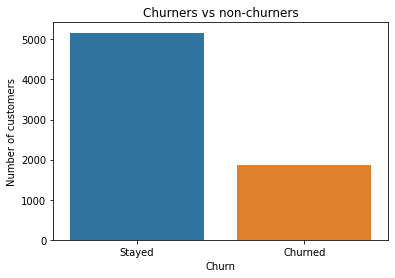

In [ ]:
# Count the amount of churners vs non-churners
sns.countplot(x = 'Churn', data = telco)

# Set titles and labels of plot
plt.title('Churners vs non-churners')
plt.ylabel('Number of customers')
plt.xlabel('Churn')

# Show plot
plt.show()



---

<center><h1> Q&A 3</h1> </center>

---





**Question 2:** What is the breakdown of tenure distirbution by churners and non-churners?

<p align="center">
<img src="https://github.com/adelnehme/introduction-to-python/blob/master/assets/boxplot.png?raw=true" alt = "boxplot" width="65%">
</p>

_To create a boxplot using_ `seaborn` _we can use:_

- `sns.boxplot(x = , y = , data = )`
  - `x`: _column name on x-axis_
  - `y`: _column name on y-axis_
  - `data`: _data being used_
- `plt.title()`: _sets plot title_
- `plt.xlabel()`: _sets x-axis label_
- `plt.ylabel()`: _sets y-axis label_
- `plt.show()`: _shows plot_

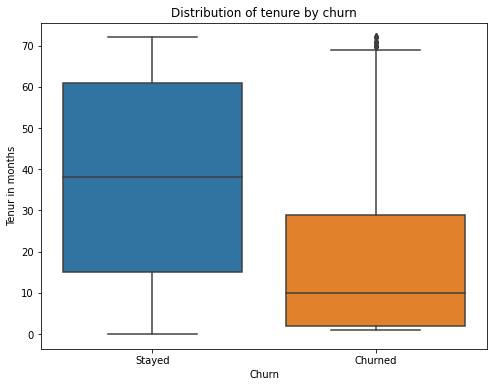

In [ ]:
# Set figure size for easy viewing
plt.figure(figsize = (8,6))

# Create plot
sns.boxplot(x = 'Churn', y = 'tenure', data = telco)

# Set titles and labels of plot
plt.title('Distribution of tenure by churn')
plt.ylabel('Tenur in months')
plt.xlabel('Churn')

# Show plot
plt.show()



---

<center><h1> Q&A 4</h1> </center>

---





**Question 3:** What is the average monthly charge for churners vs non-churners?


*Similar to pivot tables, we can aggregate data around a column in a DataFrame using the* `.groupby()` *method and chaining it with the summary statistics of choice. For example, we can group by* `col_A` *in* `df_1` *and extract the mean of remaining numeric columns using:* 

```
grouped_dataframe = df_1.groupby('col_A').mean()
```

In [ ]:
# Group by Churn and derive mean MonthlyCharges
telco_grouped = telco.groupby('Churn').mean().reset_index()

# Show output
telco_grouped

,Churn,tenure,MonthlyCharges,TotalCharges
0,Churned,18.008052,74.494418,1534.839962
1,Stayed,37.545015,61.260445,2551.620334


_To create a barplot using_ `seaborn` _we can use:_

- `sns.barplot(x = , y = , data = )`
  - `x`: _column name on x-axis_
  - `y`: _column name on y-axis_
  - `data`: _data being used_

_To customize plots using_ `matplotlib` _we can use:_

- `plt.title()`: _sets plot title_
- `plt.xlabel()`: _sets x-axis label_
- `plt.ylabel()`: _sets y-axis label_
- `plt.show()`: _shows plot_


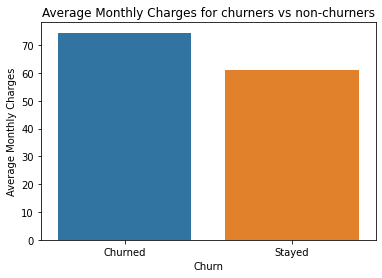

In [ ]:
# Visualize the results
sns.barplot(x = 'Churn', y = 'MonthlyCharges', data = telco_grouped)

# Customize output
plt.xlabel("Churn")
plt.ylabel("Average Monthly Charges")
plt.title("Average Monthly Charges for churners vs non-churners")
plt.show()



---

<center><h1> Q&A 5</h1> </center>

---



